In [15]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# columns_long_list = ['url', 'text', 'tokens', 'level complexity']
# columns_short_list = ['url', 'text', 'tokens']
# df = pd.read_json('data/ground_true_plan_steps_new.json')
with open('data/ground_true_plan_steps_new.json') as f:
    data = json.load(f)

df =  pd.DataFrame.from_dict(data["study_subjects"]["research_software"])
# df.drop([0,3,10,12,13,18,19,26,28,33])
df


,id,name,url,n_plans,plans,readme_instructions
0,1,AAAI-DISIM-UnivAQ/DALI,https://raw.githubusercontent.com/AAAI-DISIM-U...,2,"[{'type': 'Source', 'steps': [{'text': '1. To...",## Installation **OS X & Linux:** 1. To downlo...
1,2,BingqingCheng/cace,https://raw.githubusercontent.com/BingqingChen...,1,"[{'type': 'Source', 'steps': [{'text': 'Please...",## Installation \n Please refer to the `setup....
2,3,less-and-less-bugs/Trust_TELLER,https://raw.githubusercontent.com/less-and-les...,1,"[{'type': 'Source', 'steps': [{'text': 'Step 1...",## Getting Started Step 1: Download the datase...
3,4,utiasASRL/steam_icp,https://raw.githubusercontent.com/utiasASRL/st...,1,"[{'type': 'Container', 'steps': [{'text': 'Clo...",## Installation Clone this repository and its ...
4,5,PFischbeck/parameter-fitting-experiments,https://raw.githubusercontent.com/PFischbeck/p...,1,"[{'type': 'Source', 'steps': [{'text': '- Make...","# Installation - Make sure you have Python, Pi..."
5,6,gabbypinto/GET-Tok-Peru,https://raw.githubusercontent.com/gabbypinto/G...,1,"[{'type': 'Source', 'steps': [{'text': 'pip in...",## Installation pip install -r requirements.tx...
6,7,jonarriza96/gsft,https://raw.githubusercontent.com/jonarriza96/...,1,"[{'type': 'Source', 'steps': [{'text': '### De...",## Installation ### Dependencies Initialize gi...
7,8,EricssonResearch/Line-Based-Room-Segmentation-...,https://raw.githubusercontent.com/EricssonRese...,1,"[{'type': 'Source', 'steps': [{'text': 'The pr...",## Installation The project can be installed b...
8,9,viralInformatics/VIGA,https://raw.githubusercontent.com/viralInforma...,1,"[{'type': 'Source', 'steps': [{'text': 'Downlo...",## Installation ### Step1: Download VIGA Downl...
9,10,scimemia/NRN-EZ,https://raw.githubusercontent.com/scimemia/NRN...,3,"[{'type': 'Binary', 'steps': [{'text': 'Instal...","NRN-EZ was built with PyInstaller 3.6, and req..."


In [37]:
print(df.dtypes)

id                     object
name                   object
url                    object
n_plans                object
plans                  object
readme_instructions    object
dtype: object


In [16]:
import json

# Load the JSON data
with open('data/ground_true_plan_steps_new.json') as f:
    data = json.load(f)

# print(data['study_subjects']["research_software"])

# Extract statistics
study_subjects = data['study_subjects']["research_software"]
total_subjects = 0
for subject in study_subjects:
    total_subjects = int(subject['id'])

print(f'Total subjects: {total_subjects}')

# Extract plan types
plan_types = []
for subject in study_subjects:
    for plan in subject['plans']:
        plan_types.append(plan['type'])

print(f'Plan types: {plan_types}')

# Extract readme instructions
readme_instructions = []
for subject in study_subjects:
    readme_instructions.append(subject['readme_instructions'])

print(f'Readme instructions: {readme_instructions}')

Total subjects: 33
Plan types: ['Source', 'Source', 'Source', 'Source', 'Container', 'Source', 'Source', 'Source', 'Source', 'Source', 'Binary', 'Binary', 'Binary', 'Source', 'Source', 'Container', 'Source', 'Source', 'Source', 'Source', 'Source', 'Packagemanager', 'Packagemanager', 'Binary', 'Packagemanager', 'Packagemanager', 'Packagemanager', 'Source', 'Source', 'Source', 'Source', 'Source', 'Packagemanager', 'Packagemanager', 'Source', 'Container', 'Source', 'Source', 'Source', 'Source', 'Source', 'Packagemanager', 'Source', 'Source']
Readme instructions: ["## Installation **OS X & Linux:** 1. To download and install SICStus Prolog (it is needed), follow the instructions at https://sicstus.sics.se/download4.html. 2. Then, you can download DALI and test it by running an example DALI MAS: ```sh git clone https://github.com/AAAI-DISIM-UnivAQ/DALI.git cd DALI/Examples/advanced bash startmas.sh ``` &nbsp;&nbsp;&nbsp;&nbsp; You will see different windows opening: * &nbsp;&nbsp;&nbsp;&nbs

In [17]:
plan_types_and_steps = {}

for subject in study_subjects:
    plan_types_and_steps[subject['id']] = {}
    for plan in subject['plans']:
        plan_types_and_steps[subject['id']][plan['type']] = len(plan['steps'])

# Print the plan types and number of steps per type
for id, plan_types in plan_types_and_steps.items():
    print(f'For ID - {id}:')
    print('| Plan Type | Number of Steps |')
    print('|-----------|-----------------|')
    for plan_type, num_steps in plan_types.items():
        print(f'| {plan_type} | {num_steps} |')

For ID - 1:
| Plan Type | Number of Steps |
|-----------|-----------------|
| Source | 3 |
For ID - 2:
| Plan Type | Number of Steps |
|-----------|-----------------|
| Source | 1 |
For ID - 3:
| Plan Type | Number of Steps |
|-----------|-----------------|
| Source | 2 |
For ID - 4:
| Plan Type | Number of Steps |
|-----------|-----------------|
| Container | 3 |
For ID - 5:
| Plan Type | Number of Steps |
|-----------|-----------------|
| Source | 7 |
For ID - 6:
| Plan Type | Number of Steps |
|-----------|-----------------|
| Source | 1 |
For ID - 7:
| Plan Type | Number of Steps |
|-----------|-----------------|
| Source | 3 |
For ID - 8:
| Plan Type | Number of Steps |
|-----------|-----------------|
| Source | 1 |
For ID - 9:
| Plan Type | Number of Steps |
|-----------|-----------------|
| Source | 10 |
For ID - 10:
| Plan Type | Number of Steps |
|-----------|-----------------|
| Binary | 1 |
For ID - 11:
| Plan Type | Number of Steps |
|-----------|-----------------|
| Source

In [36]:
# # Extract statistics
# study_subjects = data['study_subjects']

# # Create a dictionary to store the plan types and number of steps per type
# plan_types_and_steps = {}

# for subject in study_subjects:
#     plan_types_and_steps[subject['id']] = {}
#     for plan in subject['plans']:
#         plan_types_and_steps[subject['id']][plan['type']] = len(plan['steps'])

# Calculate the average number of steps for each plan type for each id
# plan_types_and_steps_averages = {}
# for id, plan_types in plan_types_and_steps.items():
    # plan_types_and_steps_averages[id] = {}
    # for plan_type, num_steps in plan_types_and_steps.items():
    #     plan_types_and_steps_averages[id][plan_type] = sum(int(num_steps)) / len(int(num_steps))

In [18]:
import json

def extract_attributes(data):
    extracted_data = []

    for subject in data.get("study_subjects", {}).get("research_software", []):
        subject_data = {"id": subject["id"],"name": subject["name"], "plans": [], "readme_instructions": subject["readme_instructions"]}

        for plan in subject.get("plans", []):
            plan_data = {
                "type": plan.get("type", ""),
                "steps": [{"text": step["text"], "note": step["note"], "seq_order": step["seq_order"], "is_optional": step["is_optional"], "commands": step["commands"]} for step in plan.get("steps", [])],
                "technology": plan.get("technology", [])
            }

            subject_data["plans"].append(plan_data)

        extracted_data.append(subject_data)

    return extracted_data

if __name__ == "__main__":
    # Assuming your JSON data is stored in a variable named 'json_data'
    json_data = '''
    ... (paste your JSON data here)
    '''

    try:
        with open('data/ground_true_plan_steps_new.json') as f:
            data = json.load(f)
        extracted_data = extract_attributes(data)

        # Write the extracted data to output.json
        with open('output.json', 'w', encoding='utf-8') as output_file:
            json.dump(extracted_data, output_file, ensure_ascii=False, indent=2)

        print("Extraction completed. Output written to output.json")

    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")


Extraction completed. Output written to output.json


In [9]:
import json
from tabulate import tabulate  # You may need to install the 'tabulate' library using 'pip install tabulate'

def calculate_statistics(extracted_data):
    statistics = []

    for subject_data in extracted_data:
        id_statistics = {"name": subject_data["name"], "type_counts": {}, "total_steps": 0, "average_steps_per_type": {}}

        for plan_data in subject_data.get("plans", []):
            plan_type = plan_data.get("type", "")

            # Count occurrences of each plan type
            id_statistics["type_counts"][plan_type] = id_statistics["type_counts"].get(plan_type, 0) + 1

            # Count total number of steps
            id_statistics["total_steps"] += len(plan_data.get("steps", []))

        # Calculate average number of steps per type
        for plan_type, count in id_statistics["type_counts"].items():
            id_statistics["average_steps_per_type"][plan_type] = id_statistics["total_steps"] / count if count > 0 else 0

        statistics.append(id_statistics)

    return statistics

if __name__ == "__main__":
    try:
        # Load the extracted data from output.json
        with open('output.json', 'r', encoding='utf-8') as input_file:
            extracted_data = json.load(input_file)

        # Calculate statistics
        statistics = calculate_statistics(extracted_data)

        # Prepare data for tabulate
        table_data = []
        headers = ["ID", "Type Counts", "Total Steps", "Average Steps per Type"]

        for stat in statistics:
            row = [
                stat["name"],
                json.dumps(stat["type_counts"], indent=None),
                stat["total_steps"],
                json.dumps(stat["average_steps_per_type"], indent=None)
            ]
            table_data.append(row)

        # Print the tabular format
        print(tabulate(table_data, headers=headers, tablefmt="pretty"))

    except FileNotFoundError:
        print("Error: output.json not found. Please run the previous script to generate it.")

    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")


+-------------------------------------------------------+------------------------------------+-------------+----------------------------------------+
|                          ID                           |            Type Counts             | Total Steps |         Average Steps per Type         |
+-------------------------------------------------------+------------------------------------+-------------+----------------------------------------+
|                AAAI-DISIM-UnivAQ/DALI                 |           {"Source": 2}            |      5      |            {"Source": 2.5}             |
|                  BingqingCheng/cace                   |           {"Source": 1}            |      1      |            {"Source": 1.0}             |
|                       NO-VALID                        |           {"Source": 1}            |      1      |            {"Source": 1.0}             |
|            less-and-less-bugs/Trust_TELLER            |           {"Source": 1}            |      

In [10]:
import json

def calculate_readme_length(extracted_data):
    readme_lengths = {}

    for subject_data in extracted_data:
        id_value = subject_data["id"]
        readme_instructions = subject_data.get("readme_instructions", "")

        # Calculate total length of the readme_instructions for each id
        readme_lengths[id_value] = len(readme_instructions)

    return readme_lengths

def calculate_total_readme_length(extracted_data):
    readme_lengths = calculate_readme_length(extracted_data)
    
    # Calculate total length of readme_instructions
    total_readme_length = sum(readme_lengths.values())
    
    return total_readme_length

def calculate_average_total_readme_length(extracted_data):
    readme_lengths = calculate_readme_length(extracted_data)

    # Calculate total average length of readme_instructions
    total_readme_length = sum(readme_lengths.values())
    total_average_readme_length = total_readme_length / len(readme_lengths) if len(readme_lengths) > 0 else 0

    return total_average_readme_length

if __name__ == "__main__":
    try:
        # Load the extracted data from output.json
        with open('output.json', 'r', encoding='utf-8') as input_file:
            extracted_data = json.load(input_file)

        # Calculate total length of readme_instructions for each id
        readme_lengths = calculate_readme_length(extracted_data)

        # Print the total length of readme_instructions for each id
        print("Total length of 'readme_instructions' for each 'id':")
        for id_value, length in readme_lengths.items():
            print(f"ID: {id_value}, Total Length: {length}")

        # Calculate and print the total average length of readme_instructions
        total_average_readme_length = calculate_average_total_readme_length(extracted_data)
        print(f"\nTotal Average Length of 'readme_instructions' for all 'id': {total_average_readme_length:.2f}")

    except FileNotFoundError:
        print("Error: output.json not found. Please run the previous script to generate it.")

    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")


Total length of 'readme_instructions' for each 'id':
ID: 1, Total Length: 1324
ID: 2, Total Length: 84
ID: 3, Total Length: 0
ID: 4, Total Length: 518
ID: 5, Total Length: 776
ID: 6, Total Length: 798
ID: 7, Total Length: 280
ID: 8, Total Length: 513
ID: 9, Total Length: 139
ID: 10, Total Length: 1765
ID: 11, Total Length: 588
ID: 12, Total Length: 588
ID: 13, Total Length: 588
ID: 14, Total Length: 761
ID: 15, Total Length: 324
ID: 16, Total Length: 3937
ID: 17, Total Length: 652
ID: 18, Total Length: 411
ID: 19, Total Length: 588
ID: 20, Total Length: 277
ID: 21, Total Length: 1035
ID: 22, Total Length: 1862
ID: 23, Total Length: 1023
ID: 24, Total Length: 124
ID: 25, Total Length: 800
ID: 26, Total Length: 277
ID: 27, Total Length: 428
ID: 28, Total Length: 247
ID: 29, Total Length: 310
ID: 30, Total Length: 270
ID: 31, Total Length: 153
ID: 32, Total Length: 240
ID: 33, Total Length: 277
ID: 34, Total Length: 1194
ID: 35, Total Length: 145
ID: 36, Total Length: 375
ID: 37, Total Le

In [11]:
import json

def calculate_group_statistics(extracted_data):
    group_statistics = {}

    for subject_data in extracted_data:
        id_value = subject_data["id"]
        types_and_technologies = []

        for plan_data in subject_data.get("plans", []):
            plan_type = plan_data.get("type", "")
            technologies = plan_data.get("technology", [])

            # Create a unique key for the group based on types and technologies
            group_key = (tuple(sorted(set([plan_type]))), tuple(sorted(set(technologies))))

            # Update the count for the group
            group_statistics.setdefault(group_key, {"count": 0, "ids": []})
            group_statistics[group_key]["count"] += 1
            group_statistics[group_key]["ids"].append(id_value)

    return group_statistics

if __name__ == "__main__":
    try:
        # Load the extracted data from output.json
        with open('output.json', 'r', encoding='utf-8') as input_file:
            extracted_data = json.load(input_file)

        # Calculate group statistics
        group_statistics = calculate_group_statistics(extracted_data)

        # Print the group statistics
        print("Group of IDs with unique counts for each unique type and technology:")
        for group_key, stats in group_statistics.items():
            type_str = ', '.join(group_key[0])
            tech_str = ', '.join(group_key[1])
            count = stats["count"]
            ids = ', '.join(map(str, stats["ids"]))
            print(f"Group: Types({type_str}), Technologies({tech_str}), Count: {count}, IDs: {ids}")

    except FileNotFoundError:
        print("Error: output.json not found. Please run the previous script to generate it.")

    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")


Group of IDs with unique counts for each unique type and technology:
Group: Types(Source), Technologies(Linux), Count: 3, IDs: 1, 16, 39
Group: Types(Source), Technologies(Windows), Count: 1, IDs: 1
Group: Types(Source), Technologies(), Count: 25, IDs: 2, 3, 4, 6, 7, 8, 9, 10, 14, 15, 17, 18, 20, 23, 25, 26, 27, 29, 31, 32, 33, 34, 35, 36, 37
Group: Types(Container), Technologies(Docker), Count: 3, IDs: 5, 16, 30
Group: Types(Binary), Technologies(Linux), Count: 4, IDs: 11, 12, 13, 19
Group: Types(Binary), Technologies(Mac), Count: 3, IDs: 11, 13, 19
Group: Types(Binary), Technologies(Windows), Count: 2, IDs: 11, 13
Group: Types(Source), Technologies(Mac), Count: 1, IDs: 16
Group: Types(Packagemanager), Technologies(Linux, Windows), Count: 1, IDs: 21
Group: Types(Packagemanager), Technologies(Mac), Count: 1, IDs: 21
Group: Types(Binary), Technologies(), Count: 1, IDs: 21
Group: Types(Packagemanager), Technologies(pip), Count: 3, IDs: 22, 23, 28
Group: Types(Packagemanager), Technologie

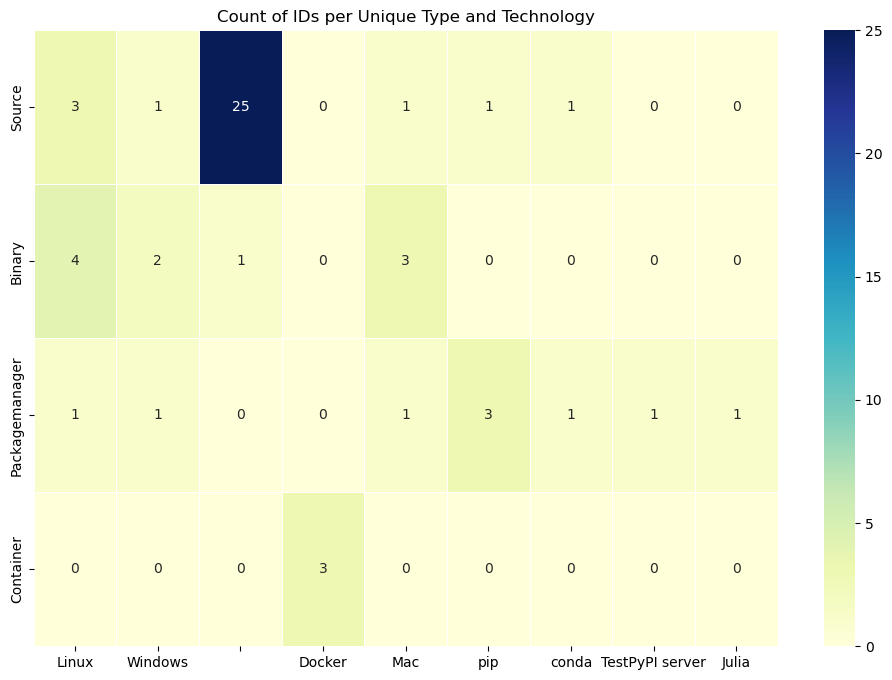

In [12]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_technology_type_statistics(extracted_data):
    technology_type_statistics = {}

    for subject_data in extracted_data:
        id_value = subject_data["id"]

        for plan_data in subject_data.get("plans", []):
            plan_type = plan_data.get("type", "")
            technologies = plan_data.get("technology", [])

            for tech in technologies:
                # Update the count for each combination of type and technology
                technology_type_statistics.setdefault(tech, {}).setdefault(plan_type, 0)
                technology_type_statistics[tech][plan_type] += 1

    return technology_type_statistics

def plot_heatmap(data, title):
    plt.figure(figsize=(12, 8))
    sns.heatmap(data, annot=True, cmap="YlGnBu", fmt='d', linewidths=.5)
    plt.title(title)
    plt.show()

if __name__ == "__main__":
    try:
        # Load the extracted data from output.json
        with open('output.json', 'r', encoding='utf-8') as input_file:
            extracted_data = json.load(input_file)

        # Calculate technology type statistics
        tech_type_statistics = calculate_technology_type_statistics(extracted_data)

        # Create a DataFrame for better plotting
        df = pd.DataFrame(tech_type_statistics).fillna(0).astype(int)

        # Plot the heatmap
        plot_heatmap(df, "Count of IDs per Unique Type and Technology")

    except FileNotFoundError:
        print("Error: output.json not found. Please run the previous script to generate it.")

    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")


In [14]:
import json
import pandas as pd

def calculate_plan_type_statistics(extracted_data):
    plan_type_statistics = {plan_type: {"total_steps": 0, "total_optional_steps": 0, "total_notes_length": 0, "total_commands_length": 0, "unique_technologies": set()}
                            for plan_type in ["Container", "Binary", "Source", "PackageManager"]}

    for subject_data in extracted_data:
        for plan_data in subject_data.get("plans", []):
            plan_type = plan_data.get("type", "")

            # Skip processing if the plan type is not one of the expected values
            if plan_type not in plan_type_statistics:
                continue

            steps = plan_data.get("steps", [])
            technologies = plan_data.get("technology", [])

            total_steps = len(steps)
            total_optional_steps = sum(1 for step in steps if step.get("is_optional", False))
            total_notes_length = sum(len(step.get("note", "")) for step in steps)
            total_commands_length = sum(len(step.get("commands", "")) for step in steps)

            # Update the statistics for each plan type
            plan_type_statistics[plan_type]["total_steps"] += total_steps
            plan_type_statistics[plan_type]["total_optional_steps"] += total_optional_steps
            plan_type_statistics[plan_type]["total_notes_length"] += total_notes_length
            plan_type_statistics[plan_type]["total_commands_length"] += total_commands_length
            plan_type_statistics[plan_type]["unique_technologies"].update(technologies)

    return plan_type_statistics

if __name__ == "__main__":
    try:
        # Load the extracted data from output.json
        with open('output.json', 'r', encoding='utf-8') as input_file:
            extracted_data = json.load(input_file)

        # Calculate plan type statistics
        plan_type_statistics = calculate_plan_type_statistics(extracted_data)

        # Create DataFrames for better tabular output
        df_list = []

        for plan_type, stats in plan_type_statistics.items():
            df_list.append([plan_type, stats["total_steps"], stats["total_optional_steps"],
                            stats["total_notes_length"], stats["total_commands_length"],
                            ", ".join(stats["unique_technologies"])])

        columns = ["Plan Type", "Total Steps", "Total Optional Steps", "Total Notes Length", "Total Commands Length", "Unique Technologies"]
        df = pd.DataFrame(df_list, columns=columns)

        # Print the tabular format for each plan type
        for plan_type, stats in plan_type_statistics.items():
            filtered_df = df[df["Plan Type"] == plan_type]
            print(f"\nStatistics for Plan Type: {plan_type}\n")
            print(filtered_df)

    except FileNotFoundError:
        print("Error: output.json not found. Please run the previous script to generate it.")

    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")



Statistics for Plan Type: Container

   Plan Type  Total Steps  Total Optional Steps  Total Notes Length  \
0  Container            9                     1                 851   

   Total Commands Length Unique Technologies  
0                    614              Docker  

Statistics for Plan Type: Binary

  Plan Type  Total Steps  Total Optional Steps  Total Notes Length  \
1    Binary           10                     0                   0   

   Total Commands Length    Unique Technologies  
1                      0  Mac, , Windows, Linux  

Statistics for Plan Type: Source

  Plan Type  Total Steps  Total Optional Steps  Total Notes Length  \
2    Source           88                     9                3101   

   Total Commands Length                Unique Technologies  
2                   5080  , Windows, Linux, Mac, conda, pip  

Statistics for Plan Type: PackageManager

        Plan Type  Total Steps  Total Optional Steps  Total Notes Length  \
3  PackageManager            0